In [122]:
#Importa as bibliotecas e funções a serem usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, recall_score
from sklearning.metrics import accuracy_score


In [123]:
train = pd.read_csv(r'C:\Users\iurig\Desktop\Estudos\Estudo ML\Desafio 1\Base de Dados\train.csv')

train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [124]:
test = pd.read_csv(r'C:\Users\iurig\Desktop\Estudos\Estudo ML\Desafio 1\Base de Dados\test.csv')

test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


Como o Kaggle separa as bases em train(Base usada para criar, treinar e testar o medelo) e test(Base usada para fazer a entrega e computação da pontuação), eu vou manter os IDs do conjunto de teste, juntar ambas as bases para fazer a análise exploratória e limpeza e depois separo novamente, dessa forma o processamento dos dados não precisará ser repetido

In [125]:
#Armazena os ID da base de teste
id_test = test["PassengerId"]

In [126]:
#Agrupa as duas bases
data = pd.concat([train,test])

## Análise Exploratória

Início avaliando a integridade e qualidade de cada coluna

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


Como algumas colunas contem valores nulos, será preciso efetuar o tratamento das mesmas, o tratamento será feito da seguinte forma:

- Dados categóricos: Preenchido com a Moda da coluna

- Dados numéricos: Preenchido com a Média da coluna

In [78]:
# Coluna de Planetas
data.HomePlanet.fillna(data.HomePlanet.mode()[0],inplace=True)

#Sono Criogenico
data.CryoSleep.fillna(data.CryoSleep.mode()[0],inplace=True)

#Destino
data.Destination.fillna(data.Destination.mode()[0],inplace=True)

#Idade - A média foi arredondada, já que nenhum dado da coluna é do tipo float
data.Age.fillna(np.round(data.Age.mean()),inplace=True)

#VIP
data['VIP'].fillna(data['VIP'].mode()[0],inplace=True)

#Cabine
data.Cabin.fillna(data.Cabin.mode()[0],inplace=True)

As colunas de consumo não agregam na análise, não tendo importância, portanto serão ignoradas e excluidas da base

In [79]:
data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1,inplace=True)

Agora, chamo a atenção para a coluna de Cabine. Como na base de dados nos não temos a informação da classe social ou então da região da nave onde o passageiro se encontra, nos podemos usar os dados de cabine para estimar isso.

In [80]:
data.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
4272    G/1496/S
4273     G/160/P
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 12970, dtype: object


Como dá para reparar, a primeira letra se trata da região onde a cabine se encontra, como não é importante a ordem de prioridade das cabine e nem o número em específico, vamos apenas extrair a primeira letra de cada entrada da coluna

In [81]:
cabine = []

data.Cabin.apply(lambda x: cabine.append(x.split('/')[0]))

data.Cabin = cabine

In [82]:
#Base final, pós processamento
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  12970 non-null  object 
 1   HomePlanet   12970 non-null  object 
 2   CryoSleep    12970 non-null  bool   
 3   Cabin        12970 non-null  object 
 4   Destination  12970 non-null  object 
 5   Age          12970 non-null  float64
 6   VIP          12970 non-null  bool   
 7   Transported  8693 non-null   object 
dtypes: bool(2), float64(1), object(5)
memory usage: 734.6+ KB


Separar novamente entre teste e treino

## Preparação de Treino

Como dito anteriormente, vamos agora separar as tabelas entre treino e teste

In [130]:
#Armazendo o treino tratado ao mesmo tempo que excluo a coluna PassengerId, já que não tem mais serventia para nos
treino_tradado = data.set_index('PassengerId').drop(id_test).reset_index(drop=True)

treino_tradado

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [84]:
#Armazendo o teste tratado ao mesmo tempo que excluo a coluna PassengerId, já que não tem mais serventia para nos
teste_tradado = data.set_index('PassengerId').loc[id_test].drop('Transported',axis=True)

teste_tradado

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
PassengerId,,,,,,
0013_01,Earth,True,G,TRAPPIST-1e,27.0,False
0018_01,Earth,False,F,TRAPPIST-1e,19.0,False
0019_01,Europa,True,C,55 Cancri e,31.0,False
0021_01,Europa,False,C,TRAPPIST-1e,38.0,False
0023_01,Earth,False,F,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...
9266_02,Earth,True,G,TRAPPIST-1e,34.0,False
9269_01,Earth,False,G,TRAPPIST-1e,42.0,False
9271_01,Mars,True,D,55 Cancri e,29.0,False


## Codificação

A análise foi feita e as tabelas separadas, porém ainda é necessário fazer a padronização das medidas, mas esse assunto será abordado futuramente quando avaliarmos os modelos

In [85]:
#Tratamento de colunas categóricas
categoricas_treino = treino_tradado[['HomePlanet','Destination','Cabin']]

#Padronização feita com a função get_dummies do propio pandas
categoricas_tratadas_treino = pd.get_dummies(categoricas_treino)

categoricas_tratadas_treino

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,0,1,0,0,0,0,0,0,0
8689,1,0,0,0,1,0,0,0,0,0,0,0,1,0
8690,1,0,0,0,0,1,0,0,0,0,0,0,1,0
8691,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [86]:
#Tratamento de colunas numéricas
booleanas_treino = treino_tradado[['CryoSleep','VIP','Transported']]

#Transformação das funções do tipo boleanas em numéricas
booleanas_tratadas_treino = booleanas_treino.astype(int)

booleanas_tratadas_treino

,CryoSleep,VIP,Transported
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,0
4,0,0,1
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,0,0,1
8691,0,0,0


In [87]:
#Agrupamento das tabelas padronizadas
treino_finalizado = pd.concat([categoricas_tratadas_treino,booleanas_tratadas_treino,treino_tradado['Age']],axis=1)

treino_finalizado

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,CryoSleep,VIP,Transported,Age
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,39.0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,24.0
2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,58.0
3,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,33.0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,41.0
8689,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,18.0
8690,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,26.0
8691,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,32.0


Uma avaliação que não fizemos anteriormente foi a análise do balanceamento da variável "Transported"

1    4378
0    4315
Name: Transported, dtype: int64


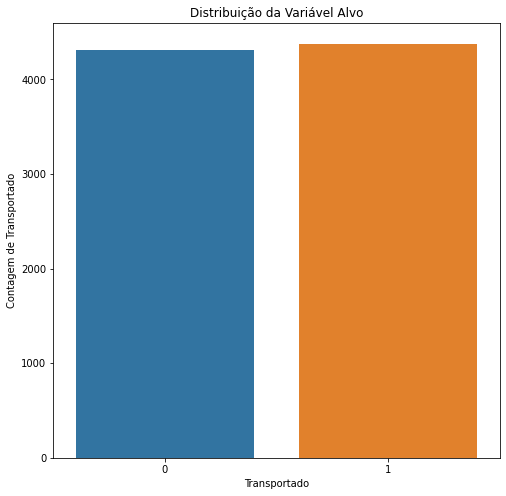

In [142]:
print(treino_finalizado.Transported.value_counts())

plt.figure(figsize=(8,8))
sns.countplot(x=treino_finalizado.Transported)

plt.title('Distribuição da Variável Alvo')
plt.xlabel('Transportado')
plt.ylabel('Contagem de Transportado')

plt.savefig('balanceamento variavel alvo.png',bbox_inches = 'tight')

Por ser uma base inicial do Kaggle, era de se esperar que operação mais complexas como o balanceamento da coluna não seria necessário, logo, como a coluna já está balanceada não será necessário equilibrá-la 

## Preparação de Teste

In [89]:
#Tratamento de colunas categóricas
categoricas_teste = teste_tradado[['HomePlanet','Destination','Cabin']]

categoricas_tratadas_teste = pd.get_dummies(categoricas_teste)

categoricas_tratadas_teste

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
PassengerId,,,,,,,,,,,,,,
0013_01,1,0,0,0,0,1,0,0,0,0,0,0,1,0
0018_01,1,0,0,0,0,1,0,0,0,0,0,1,0,0
0019_01,0,1,0,1,0,0,0,0,1,0,0,0,0,0
0021_01,0,1,0,0,0,1,0,0,1,0,0,0,0,0
0023_01,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,1,0,0,0,0,1,0,0,0,0,0,0,1,0
9269_01,1,0,0,0,0,1,0,0,0,0,0,0,1,0
9271_01,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [90]:
#Tratamento de colunas numéricas
booleanas_teste = teste_tradado[['CryoSleep','VIP']]

#Transformação das funções do tipo boleanas em numéricas
booleanas_tratadas_teste = booleanas_teste.astype(int)

booleanas_tratadas_teste

,CryoSleep,VIP
PassengerId,,
0013_01,1,0
0018_01,0,0
0019_01,1,0
0021_01,0,0
0023_01,0,0
...,...,...
9266_02,1,0
9269_01,0,0
9271_01,1,0


In [91]:
#Agrupamento das tabelas padronizadas
teste_finalizado = pd.concat([categoricas_tratadas_teste,booleanas_tratadas_teste,teste_tradado['Age']],axis=1)

teste_finalizado

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,CryoSleep,VIP,Age
PassengerId,,,,,,,,,,,,,,,,,
0013_01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,27.0
0018_01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,19.0
0019_01,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,31.0
0021_01,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,38.0
0023_01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,34.0
9269_01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,42.0
9271_01,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,29.0


Tudo pronto, agora sim podemos iniciar o passo a passo do uso de modelos.

1° - Da base de treino_finalizado, vou separar entre Input e Target

In [92]:
#Input
X = treino_finalizado.drop('Transported',axis=1)
#Target
Y = treino_finalizado['Transported']

Os dados de treino e teste serão separados com a função shuffle ativa, afim de embralharar os dados, e a tabela teste terá 30% do tamanho da tabela Y original 

In [22]:
#Separação entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=40,shuffle=True,test_size=0.3)

## Avaliação e escolha de modelos

Como dito anteriomente, ainda é necessário efetuar a padronização dos dados, para que valores muito altos não atrapalhem no treino dos nossos modelos. Mesmo que nossa base seja quase que inteiramente binária e a coluna de idade poderia facilmente ser padronizada isoladamente, porém é uma boa prática sempre levar em conta o processo de padronização

Com isso em mente, faremos uma avaliação prévia dos modelos testando cada um com os variados métodos de padronização. Usaremos:

Modelos:
- Random Forest Classifier
- Logistic Regression
- XGB Classifier
- Linear Discriminant Analysis
- SVC
- SGD Classifier

Padronização:
- Standard Scaler
- Robust Scaler
- Quantile Transformer
- Quantile Transformer - Normal
- Power Transformer

Contudo, é necessário avisar que nesse estudo não aprofundaremos no conceito e funcionalidade de cada modelo e padronizador.

In [23]:
#Função de Validação dos modelos
def val_model(X, y,clf, quite=False):

  X = np.array(X)
  y = np.array(y)

# Definindo a padronização antes da validação
  pipeline1 = make_pipeline(StandardScaler(), clf)
  pipeline2 = make_pipeline(RobustScaler(), clf)
  pipeline3 = make_pipeline(QuantileTransformer(), clf)
  pipeline4 = make_pipeline(QuantileTransformer(output_distribution='normal'), clf)
  pipeline5 = make_pipeline(PowerTransformer(method='yeo-johnson'), clf)
  
  scores1 = cross_val_score(pipeline1, X, y, scoring='recall')
  scores2 = cross_val_score(pipeline2, X, y, scoring='recall')
  scores3 = cross_val_score(pipeline3, X, y, scoring='recall')
  scores4 = cross_val_score(pipeline4, X, y, scoring='recall')
  scores5 = cross_val_score(pipeline5, X, y, scoring='recall')

  if quite == False:
    print('Recall StandardScaler: {:.4f} (+/- {:.4f})'.format(scores1.mean(), scores1.std() * 2))
    print('Recall RobustScaler: {:.4f} (+/- {:.4f})'.format(scores2.mean(), scores2.std() * 2))
    print('Recall QuantileTransformer: {:.4f} (+/- {:.4f})'.format(scores3.mean(), scores3.std() * 2))
    print('Recall QuantileTransformer-N: {:.4f} (+/- {:.4f})'.format(scores4.mean(), scores4.std() * 2))
    print('Recall PowerTransformer: {:.4f} (+/- {:.4f})'.format(scores5.mean(), scores5.std() * 2))
  return scores1.mean()

In [24]:
# Importar Modelos a serem avaliados
rf = RandomForestClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
lda = LinearDiscriminantAnalysis()
svc = SVC()
sgd = SGDClassifier()

In [25]:
# printar o desempenho dos modelos com os dados padronizados
print('Cross-validation RF:')
score_teste1 = val_model(X_train, y_train, rf)
print('\nCross-validation LR:')
score_teste2 = val_model(X_train, y_train, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model(X_train, y_train, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model(X_train, y_train, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model(X_train, y_train, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model(X_train, y_train, sgd)

In [26]:
# importar metodos para realização do Feature Scaling
scaler = StandardScaler()
Rob_scaler = RobustScaler()
qtr = QuantileTransformer()
qtr_n = QuantileTransformer(output_distribution='normal')
pwr = PowerTransformer()

# Padronizando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)
X_train_Rscaled = Rob_scaler.fit_transform(X_train)
X_train_qtr = qtr.fit_transform(X_train)
X_train_qtr_n = qtr_n.fit_transform(X_train)
X_train_pwr = pwr.fit_transform(X_train)

# Padronizando os dados de teste
X_test_scaled = scaler.fit_transform(X_test)
X_test_Rscaled = Rob_scaler.fit_transform(X_test)
X_test_qtr = qtr.fit_transform(X_test)
X_test_qtr_n = qtr_n.fit_transform(X_test)
X_test_pwr = pwr.fit_transform(X_test)

Com a análise feita, notamos que o método de padronização que obteve um melhor desempenho com os modelos foi o Robust Scaler. Junto a isso, utilizaremos os modelos:

- XGBoost Classifier
- SVC
- Random Forest Classifier

## XGB

              precision    recall  f1-score   support

           0     0.7049    0.8047    0.7515      1321
           1     0.7655    0.6542    0.7055      1287

    accuracy                         0.7304      2608
   macro avg     0.7352    0.7295    0.7285      2608
weighted avg     0.7348    0.7304    0.7288      2608

Acuracia: 0.7304



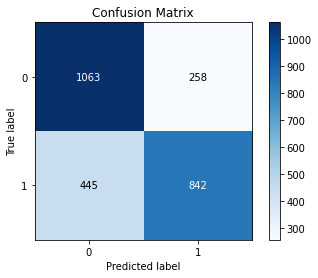

In [32]:
#Criando o modelo
xgb = XGBClassifier(learning_rate=0.1)

#Treinando o modelo
xgb.fit(X_train_Rscaled,y_train)

# Fazer previsões com os dados de teste
y_pred = xgb.predict(X_test_Rscaled)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred, digits=4))

# Imprimir a Acuracia
print('Acuracia: {:.4f}\n'.format(accuracy_score(y_test,y_pred)))


In [33]:
xgb = XGBClassifier(learning_rate=0.01)

# Parâmetros a serem otimizados
param_grid = {
    'n_estimators':[100, 200, 1000],
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled,y_train)


# Ver Resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6282701743397014 para {'n_estimators': 1000}


In [34]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators = 1000)

# Parâmetros a serem otimizados
param_grid = {
    'max_depth':[1, 3, 6],
    'min_child_weight':[1, 5, 10]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled,y_train)

# Ver Resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6324825138323416 para {'max_depth': 6, 'min_child_weight': 5}


In [35]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators = 1000, max_depth = 6, min_child_weight=5)

# Parâmetros a serem otimizados
param_grid = {
    'gamma':[0, 1, 5]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled,y_train)


# Ver Resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6341037686606118 para {'gamma': 0}


In [36]:
xgb = XGBClassifier(n_estimators = 1000, max_depth = 6, min_child_weight=5,gamma=0)

# Parâmetros a serem otimizados
param_grid = {
    'learning_rate':[0.01, 0.015, 0.02, 0.05, 0.1]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled,y_train)


# Ver Resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.7327856278627604 para {'learning_rate': 0.01}


              precision    recall  f1-score   support

           0     0.7065    0.8145    0.7567      1321
           1     0.7742    0.6527    0.7083      1287

    accuracy                         0.7347      2608
   macro avg     0.7403    0.7336    0.7325      2608
weighted avg     0.7399    0.7347    0.7328      2608

Acuracia: 0.7347



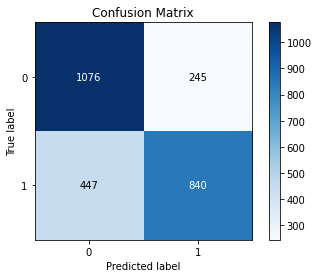

In [37]:
#Criando o modelo com os parâmetros otimizados
xgb = XGBClassifier(learning_rate=0.01, n_estimators = 1000, max_depth = 6, min_child_weight=5,gamma=0)

#Treinando o modelo
xgb.fit(X_train_Rscaled,y_train)

# Fazer previsões com os dados de teste
y_pred = xgb.predict(X_test_Rscaled)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred, digits=4))

# Imprimir a Acuracia
print('Acuracia: {:.4f}\n'.format(accuracy_score(y_test,y_pred)))

## SVC

              precision    recall  f1-score   support

           0     0.7029    0.8509    0.7699      1321
           1     0.8048    0.6309    0.7073      1287

    accuracy                         0.7423      2608
   macro avg     0.7538    0.7409    0.7386      2608
weighted avg     0.7532    0.7423    0.7390      2608

Acuracia: 0.7423



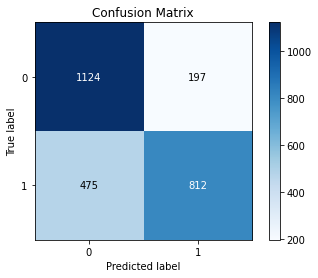

In [38]:
#Criando o modelo
svc = SVC()

#Treinando o modelo
svc.fit(X_train_Rscaled,y_train)

# Fazer previsões com os dados de teste
y_pred_svc = svc.predict(X_test_Rscaled)

#Plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test,y_pred_svc)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_svc, digits=4))

# Imprimir a Acuracia
print('Acuracia: {:.4f}\n'.format(accuracy_score(y_test,y_pred_svc)))

In [39]:
svc = SVC()

param_grid = {
    'C':[0.01, 0.1, 1.0, 10],
    'kernel':('linear', 'poly', 'rbf', 'sigmoid')
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(svc, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6438010230713018 para {'C': 0.01, 'kernel': 'rbf'}


In [40]:
svc = SVC(C=0.01, kernel='rbf')

param_grid = {
    'degree':[3, 5, 7],
    'gamma':[1, 1.5]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(svc, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8000521975153981 para {'degree': 3, 'gamma': 1.5}


              precision    recall  f1-score   support

           0     0.7049    0.8319    0.7632      1321
           1     0.7884    0.6426    0.7080      1287

    accuracy                         0.7385      2608
   macro avg     0.7467    0.7373    0.7356      2608
weighted avg     0.7461    0.7385    0.7360      2608

Acuracia: 0.7385



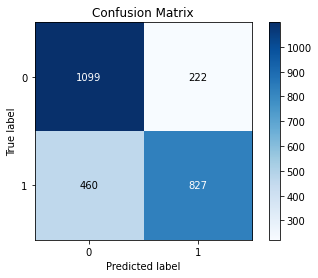

In [41]:
#Criando o modelo com os parâmetros otimizados
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma=1.5)

#Treinando o modelo
svc.fit(X_train_Rscaled,y_train)

# Fazer previsões com os dados de teste
y_pred_svc = svc.predict(X_test_Rscaled)

#Plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test,y_pred_svc)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_svc, digits=4))

# Imprimir a Acuracia
print('Acuracia: {:.4f}\n'.format(accuracy_score(y_test,y_pred_svc)))

## RF

              precision    recall  f1-score   support

           0     0.7114    0.7426    0.7267      1321
           1     0.7234    0.6908    0.7067      1287

    accuracy                         0.7170      2608
   macro avg     0.7174    0.7167    0.7167      2608
weighted avg     0.7173    0.7170    0.7168      2608

Acuracia: 0.7170



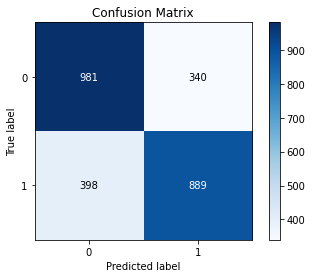

In [55]:
#Criando o modelo
rd = RandomForestClassifier()

#Treinando o modelo
rd.fit(X_train_Rscaled,y_train)

# Fazer previsões com os dados de teste
y_pred_rd = rd.predict(X_test_Rscaled)

#Plot da matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rd)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_rd, digits=4))

# Imprimir a Acuracia
print('Acuracia: {:.4f}\n'.format(accuracy_score(y_test,y_pred_rd)))

In [56]:
rd = RandomForestClassifier()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10,15, 20, 30, 40, 50, None]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rd, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6489842363503497 para {'bootstrap': True, 'max_depth': 40}


In [57]:
rd = RandomForestClassifier(bootstrap=True,max_depth=40)

param_grid = {
    'max_features': [3, 4, 5, 6],
  'min_samples_leaf': [2, 3, 4, 5, 6]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rd, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6483369871594112 para {'max_features': 3, 'min_samples_leaf': 5}


In [60]:
rd = RandomForestClassifier(bootstrap=True,max_depth=40, max_features=3, min_samples_leaf=5)

param_grid = {
    'min_samples_split':[8, 10, 12, 16],
    'n_estimators':[100, 150, 200, 250 , 300,350, 400]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rd, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6467073807286774 para {'min_samples_split': 16, 'n_estimators': 300}


              precision    recall  f1-score   support

           0     0.7096    0.8047    0.7542      1321
           1     0.7676    0.6620    0.7109      1287

    accuracy                         0.7343      2608
   macro avg     0.7386    0.7333    0.7325      2608
weighted avg     0.7382    0.7343    0.7328      2608

Acuracia: 0.7343



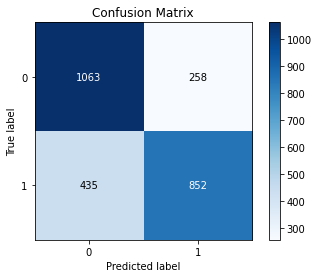

In [63]:
#Criando o modelo com os parâmetros otimizados
rd = RandomForestClassifier(bootstrap=True,max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=16, n_estimators=300)

#Criando o modelo
rd.fit(X_train_Rscaled,y_train)

# Fazer previsões com os dados de teste
y_pred_rd = rd.predict(X_test_Rscaled)

#Plot da matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rd)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_rd, digits=4))

# Imprimir Acuracia
print('Acuracia: {:.4f}\n'.format(accuracy_score(y_test,y_pred_rd)))

## Voting Classifier

Com o objetivo de alcançar a máxima acuracia, resolvi usar o Voting Classifier para agrupas os modelos que desempenharam melhor. Nesse ponto vale um reforso do nosso objetivo.

É notório que todos almejam o máximo de acertividade de seus modelos, entretanto é necessário ficar atento em quais pontos o modelo está errando, ou seja, para qual lado os erros estão caindo. Por se tratar de modelo que prever a morte de um passageiro, precisamos ter em mente que Falsos Negativos são alarmantes, sendo necessário minimizar-los o máximo possível, já que um falso positivo, mesmo causando desconforto ao passageiro, não causará mal diretamente a ele.  

              precision    recall  f1-score   support

           0     0.7059    0.8395    0.7669      1321
           1     0.7956    0.6410    0.7100      1287

    accuracy                         0.7416      2608
   macro avg     0.7507    0.7403    0.7385      2608
weighted avg     0.7502    0.7416    0.7388      2608

AUC: 0.7403



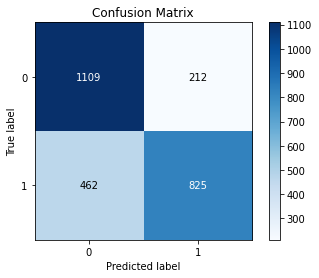

In [55]:
voting_clf = VotingClassifier(estimators=[('RF',rd),('XGB',xgb)], voting='hard', n_jobs=-1)

#Treinar Modelo
voting_clf.fit(X_train_Rscaled,y_train)

y_pred_votclass = voting_clf.predict(X_test_Rscaled)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_votclass)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_votclass, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_votclass)))
     

In [56]:
voting_clf = VotingClassifier(estimators=[('RF',rd),('XGB',xgb)])

param_grid = {
      'voting':['soft', 'hard'],
      'n_jobs':[1, 2, -1]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.6334544315690572 para {'n_jobs': 2, 'voting': 'soft'}


In [58]:
voting_clf = VotingClassifier(estimators=[('RF',rd),('XGB',xgb)])

param_grid = {
      'voting':['soft', 'hard'],
      'n_jobs':[1, 2, -1]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_Rscaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.730477594849192 para {'n_jobs': 1, 'voting': 'hard'}


              precision    recall  f1-score   support

           0     0.7039    0.8388    0.7655      1321
           1     0.7940    0.6379    0.7075      1287

    accuracy                         0.7396      2608
   macro avg     0.7490    0.7383    0.7365      2608
weighted avg     0.7484    0.7396    0.7368      2608

AUC: 0.7383



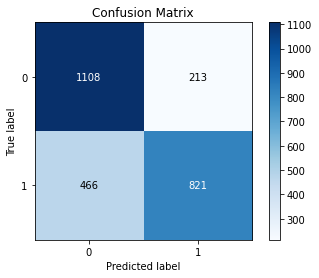

In [60]:
voting_clf = VotingClassifier(estimators=[('RF',rd),('XGB',xgb)], voting='hard', n_jobs=1)

#Treinar Modelo
voting_clf.fit(X_train_Rscaled,y_train)

y_pred_votclass = voting_clf.predict(X_test_Rscaled)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_votclass)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_votclass, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_votclass)))
     

Esse foi um bom exemplo, mesmo que o algoritmo tenha um acuracia maior do que os modelos que o componhe, ele apresenta um alto valor de Falsos Negativos. Diante disso, é perseptível que a escolha da Random Forest, já que apresentou o menor valor desse tipo de erro. 

## Fazendo Análise Usando Redes Neurais com TensorFlow

Por teimosia e por sentir que daria para extrair um pouco mais desses dados e conseguir não só uma presisão maior, mas também uma ocorrência de Falso Negativos menor, resolvi utilizar um modelo de TensorFlow, por ser uma rede neural sofisticada e bastante robusta

In [24]:
#Importação do TensorFlow e Keras
import tensorflow
from tensorflow import keras

X_train_Rscaled

In [158]:
modelo_keras = keras.Sequential([
                keras.layers.Dense(16, activation=tensorflow.nn.relu, input_shape=(X_train_Rscaled.shape[1],)),
                #keras.layers.Dense(16, activation=tensorflow.nn.relu),
                #keras.layers.Dense(8,  activation=tensorflow.nn.relu),
                keras.layers.Dense(1 , activation='sigmoid'),
])

In [159]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)

modelo_keras.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [160]:
modelo_keras.fit(X_train_Rscaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
153/153 [==============================] - 1s 3ms/step - loss: 0.6650 - accuracy: 0.5918 - val_loss: 0.6289 - val_accuracy: 0.6615
Epoch 2/10
153/153 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.6802 - val_loss: 0.5811 - val_accuracy: 0.7050
Epoch 3/10
153/153 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7058 - val_loss: 0.5570 - val_accuracy: 0.7223
Epoch 4/10
153/153 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7118 - val_loss: 0.5430 - val_accuracy: 0.7165
Epoch 5/10
153/153 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7161 - val_loss: 0.5348 - val_accuracy: 0.7231
Epoch 6/10
153/153 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7165 - val_loss: 0.5285 - val_accuracy: 0.7264
Epoch 7/10
153/153 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7198 - val_loss: 0.5247 - val_accuracy: 0.7280
Epoch 

In [161]:
y_pred_keras = modelo_keras.predict(X_test_Rscaled)

82/82 [==============================] - 0s 1ms/step


In [162]:
y_pred_final = y_pred_keras.round()

y_pred_final

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0     0.7021    0.8244    0.7584      1321
           1     0.7805    0.6410    0.7039      1287

    accuracy                         0.7339      2608
   macro avg     0.7413    0.7327    0.7311      2608
weighted avg     0.7408    0.7339    0.7315      2608

AUC: 0.7327



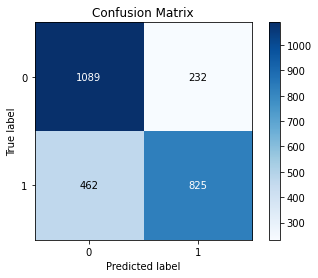

In [163]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_final)

# Imprimir Relatório de Classificação
print(classification_report(y_test, y_pred_final, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_final)))
     

## Conclusão

Por fim, o desafio do Titanic(ou no caso o Spaceship Titanic), por mais que seja um clássico, continua sendo um desafio saboroso de se fazer quando se é iniciante, ele te apresenta problemas que não exigem um conhecimento tão avançado, ao mesmo tempo que recompensa de forma agradável aqueles entusiastas que aprofundam um pouco mais durante seu aprendizado, ou até mesmos aqueles que, após trilharem seu caminho, retornam para por tudo aquilo que aprenderam em prática, podendo assim, visualizar toda a sua evolução como profissional.

Com isso em mente, vamos para a consideração final. Assim como dito no segmento "Voting Classifier", além de uma boa acertividade, nosso objetivo é criar um modelo que tenha o mínimo possível de Falsos Negativos(FN), sendo óbvio, por se tratar de vida ou morte de passageiros, já que um Falso Positivo(FP), mesmo trazendo medo e ansiedade para aqueles que serão classificados como possíveis mortos, pois ao fim ficaram satisfeitos de não terem morrido.

Com isso em mente, escolhi o modelo de **Random Foreste** com o processo de padronização **Robust Scaler**, entretando com os parâmetros iniciais, já que atingiu a menor ocorrência de Falsos Negativos, comparado aos outros modelos

Esse modelo obteve:

- 889 previsões de Transportado.

- 398 previsões de Falso Negativos.

- 340 previsões de Falsos Positivos.

Sendo esse o modelo que, em outras palavras, evitaria que o máximo de pessoas morresse, caso fosse criado um protocolo que protegesse esses passageiros de riscos.